# Multi-layerPerceptron for MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

Setup the input data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

It is a 28x28 matrix.  Each element has a value from 0 to 255, but in machine learning, we want the number to be from zero to 1.  We have to normalize the data.

In [4]:
# normalization
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

3


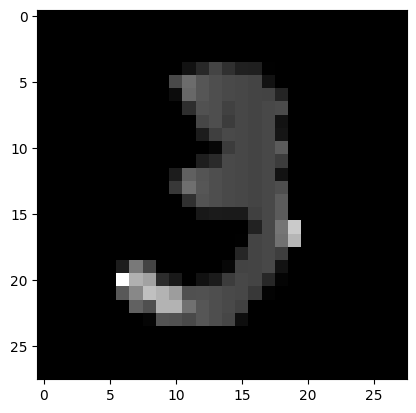

In [6]:
# show what we have
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap='gray')
print(y_train[10])

Step 2: Define the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(16, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

Step 3: Compile the model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

Step 4: Train the model

In [9]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 521us/step - loss: 1.2304 - accuracy: 0.7151
Epoch 2/10
1875/1875 [==============================] - 1s 511us/step - loss: 0.4418 - accuracy: 0.8925
Epoch 3/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.3225 - accuracy: 0.9128
Epoch 4/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.2737 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.2441 - accuracy: 0.9315
Epoch 6/10
1875/1875 [==============================] - 1s 514us/step - loss: 0.2225 - accuracy: 0.9376
Epoch 7/10
1875/1875 [==============================] - 1s 510us/step - loss: 0.2062 - accuracy: 0.9420
Epoch 8/10
1875/1875 [==============================] - 1s 508us/step - loss: 0.1931 - accuracy: 0.9453
Epoch 9/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.1820 - accuracy: 0.9488
Epoch 10/10
1875/1875 [==============================] - 1s 513u

Step 5: Print out the model summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 6: Evaluate the model

In [11]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print('Validation Accuracy:', val_acc)

313/313 [==============================] - 0s 433us/step - loss: 0.1945 - accuracy: 0.9455
Validation Accuracy: 0.9455000162124634


Step 7: Save the model for future use

In [12]:
model.save('mlp_16_16.model')

INFO:tensorflow:Assets written to: mlp_16_16.model/assets


INFO:tensorflow:Assets written to: mlp_16_16.model/assets


Load and use the model that is trained by the previous program

In [14]:
# loading our saved model
new_model = tf.keras.models.load_model('mlp_16_16.model')
# predict the testing samples
pred = new_model.predict(X_test)

313/313 [==============================] - 0s 432us/step


In [15]:
import numpy as np
# import matplotlib.pyplot as plt

8


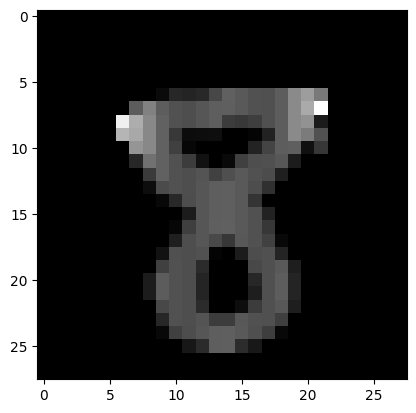

In [23]:
print(np.argmax(pred[128]))
plt.imshow(X_test[128], cmap='gray')